<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification/blob/main/Data_Pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The project is hosted on GitHub. Get a copy by running:

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification.git

Cloning into 'Dusty-Stellar-Sources-Classification'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 36 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.


# Pre

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
import seaborn as sns


!pip install pyunpack
!pip install patool
from pyunpack import Archive

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.6 MB/s 


> * **Save file function**

In [3]:
def savefile(df,name):
  t = df
  t.to_csv(name, header=True, index=True)
  return 0

---
# Data Preprocessing


## **SMC**

In [4]:
from astropy.io import fits

a = fits.open('/content/Dusty-Stellar-Sources-Classification/Data/J_MNRAS_451_3504_table2.dat.fits')
a[1].columns['---'].name = 'new_name1'
a[1].columns['---'].name = 'new_name2'
a[1].columns['---'].name = 'new_name3'
a[1].columns['---'].name = 'new_name4'
a[1].columns['---'].name = 'new_name5'
a[1].columns['---'].name = 'new_name6'

smc = pd.DataFrame(a[1].data)
smc['Class'].value_counts()

C-AGB                    39
STAR: dusty OB star      23
YSO-3                    22
RSG                      22
C-PN                     20
YSO-1                    14
O-AGB                    11
WR                       10
YSO-4                    10
O-EAGB                    8
YSO-2                     5
O-PN                      4
STAR                      4
RCrB                      3
C-PAGB                    3
HII                       3
OTHER: B[e] star          2
OTHER: FG O-EAGB          2
OTHER: S Star             1
O-PAGB                    1
OTHER: symbiotic star     1
BSG                       1
Name: Class, dtype: int64

In [5]:
a1 = smc.loc[smc['Class']=='O-AGB                ']
a2 = smc.loc[smc['Class']=='C-AGB                ']
a3 = smc.loc[smc['Class']=='YSO-1                ']
a4 = smc.loc[smc['Class']=='YSO-2                ']
a5 = smc.loc[smc['Class']=='YSO-3                ']
a6 = smc.loc[smc['Class']=='YSO-4                ']
a7 = smc.loc[smc['Class']=='RSG                  ']
a8 = smc.loc[smc['Class']=='O-EAGB               ']
a9 = smc.loc[smc['Class']=='O-PAGB               ']
b1 = smc.loc[smc['Class']=='C-PAGB               ']

a = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,b1])
a = a.reset_index(drop=True)
a['Class'].value_counts()

a['Class'] = a['Class'].replace({'YSO-1                ':'YSO','O-EAGB               ':'OAGB',
                                 'YSO-2                ':'YSO','O-AGB                ':'OAGB',
                                 'YSO-3                ':'YSO','RSG                  ':'RSG',
                                 'YSO-4                ':'YSO','C-AGB                ':'CAGB',
                                 'O-PAGB               ':'PAGB','C-PAGB               ':'PAGB'})
SMC = a
SMC['Class'].value_counts()

YSO     51
CAGB    39
RSG     22
OAGB    19
PAGB     4
Name: Class, dtype: int64

In [6]:
x_SMC = SMC[['UMmag','BMmag','VMmag','IMmag','<Vmag>','<Imag>','Iamp','P2','J2mag',
         'H2mag','Ks2mag','JImag','HImag','KImag','IRAC1','IRAC2','IRAC3','IRAC4',
         '[24]','[70]','[160]','Tmcd','Class']]

x_SMC = x_SMC.rename(columns={'UMmag':'Umag','BMmag':'Bmag','VMmag':'Vmag','IMmag':'Imag','Iamp':'IAmp',
                           'P2':'Per','JImag':'Jmag','HImag':'Hmag','KImag':'Ksmag','IRAC1':'[3.6]',
                           'IRAC2':'[4.5]','IRAC3':'[5.8]','IRAC4':'[8.0]','Tmcd':'TeffMcD' , 'Class': 'SpClass'})

print(x_SMC.shape)

(135, 23)


In [7]:
x_SMC

,Umag,Bmag,Vmag,Imag,<Vmag>,<Imag>,IAmp,Per,J2mag,H2mag,...,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],[70],[160],TeffMcD,SpClass
0,18.502,18.657,17.777,15.609,16.080,12.982,2.349,769,10.158,9.251,...,99.999,8.548,8.381,8.192,7.889,6.878,99.999,99.999,0,OAGB
1,19.632,18.512,16.438,12.922,16.376,13.066,0.200,400,11.249,10.384,...,99.999,8.715,8.365,7.835,7.204,5.388,99.999,99.999,0,OAGB
2,99.999,19.778,17.481,14.847,17.385,14.737,0.078,141,12.812,11.658,...,11.250,10.055,9.612,8.992,7.842,5.223,99.999,99.999,0,OAGB
3,99.999,99.999,99.999,99.999,99.999,16.731,2.465,896,12.184,10.765,...,99.999,8.241,7.843,7.375,6.660,3.492,99.999,99.999,0,OAGB
4,99.999,99.999,99.999,99.999,18.800,15.317,0.116,158,13.183,11.885,...,11.090,9.734,9.237,8.563,7.581,5.133,99.999,99.999,0,OAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,19.243,17.556,15.127,12.562,15.066,12.513,0.327,383,10.864,10.023,...,99.999,9.493,9.562,9.416,9.302,9.001,99.999,99.999,2825,OAGB
131,13.820,13.929,13.999,13.620,99.999,99.999,99.999,0,13.067,12.591,...,11.800,9.969,9.204,8.599,7.537,5.279,99.999,99.999,0,PAGB
132,99.999,99.999,99.999,99.999,99.999,99.999,99.999,0,17.340,15.458,...,13.950,10.571,9.477,8.514,7.521,5.041,99.999,99.999,0,PAGB
133,15.435,15.816,15.439,15.093,99.999,99.999,99.999,0,14.726,14.649,...,14.410,13.558,12.938,10.614,8.127,4.912,99.999,99.999,0,PAGB


In [8]:
SMC_DM = 18.96  # https://arxiv.org/abs/1502.06995

In [9]:
x_SMC.replace([np.inf, -np.inf, -99, 99.999 , 0.00 ], np.nan, inplace=True)
x_SMC

,Umag,Bmag,Vmag,Imag,<Vmag>,<Imag>,IAmp,Per,J2mag,H2mag,...,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],[70],[160],TeffMcD,SpClass
0,18.502,18.657,17.777,15.609,16.080,12.982,2.349,769.0,10.158,9.251,...,NaN,8.548,8.381,8.192,7.889,6.878,NaN,NaN,NaN,OAGB
1,19.632,18.512,16.438,12.922,16.376,13.066,0.200,400.0,11.249,10.384,...,NaN,8.715,8.365,7.835,7.204,5.388,NaN,NaN,NaN,OAGB
2,NaN,19.778,17.481,14.847,17.385,14.737,0.078,141.0,12.812,11.658,...,11.25,10.055,9.612,8.992,7.842,5.223,NaN,NaN,NaN,OAGB
3,NaN,NaN,NaN,NaN,NaN,16.731,2.465,896.0,12.184,10.765,...,NaN,8.241,7.843,7.375,6.660,3.492,NaN,NaN,NaN,OAGB
4,NaN,NaN,NaN,NaN,18.800,15.317,0.116,158.0,13.183,11.885,...,11.09,9.734,9.237,8.563,7.581,5.133,NaN,NaN,NaN,OAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,19.243,17.556,15.127,12.562,15.066,12.513,0.327,383.0,10.864,10.023,...,NaN,9.493,9.562,9.416,9.302,9.001,NaN,NaN,2825.0,OAGB
131,13.820,13.929,13.999,13.620,NaN,NaN,NaN,NaN,13.067,12.591,...,11.80,9.969,9.204,8.599,7.537,5.279,NaN,NaN,NaN,PAGB
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.340,15.458,...,13.95,10.571,9.477,8.514,7.521,5.041,NaN,NaN,NaN,PAGB
133,15.435,15.816,15.439,15.093,NaN,NaN,NaN,NaN,14.726,14.649,...,14.41,13.558,12.938,10.614,8.127,4.912,NaN,NaN,NaN,PAGB


In [10]:
F_list = x_SMC.columns.drop(['TeffMcD','Per','IAmp'])
for i in F_list[:-1] :
  x_SMC[i] = x_SMC[i] - SMC_DM

In [11]:
x_SMC

,Umag,Bmag,Vmag,Imag,<Vmag>,<Imag>,IAmp,Per,J2mag,H2mag,...,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],[70],[160],TeffMcD,SpClass
0,-0.458,-0.303,-1.183,-3.351,-2.880,-5.978,2.349,769.0,-8.802,-9.709,...,NaN,-10.412,-10.579,-10.768,-11.071,-12.082,NaN,NaN,NaN,OAGB
1,0.672,-0.448,-2.522,-6.038,-2.584,-5.894,0.200,400.0,-7.711,-8.576,...,NaN,-10.245,-10.595,-11.125,-11.756,-13.572,NaN,NaN,NaN,OAGB
2,NaN,0.818,-1.479,-4.113,-1.575,-4.223,0.078,141.0,-6.148,-7.302,...,-7.71,-8.905,-9.348,-9.968,-11.118,-13.737,NaN,NaN,NaN,OAGB
3,NaN,NaN,NaN,NaN,NaN,-2.229,2.465,896.0,-6.776,-8.195,...,NaN,-10.719,-11.117,-11.585,-12.300,-15.468,NaN,NaN,NaN,OAGB
4,NaN,NaN,NaN,NaN,-0.160,-3.643,0.116,158.0,-5.777,-7.075,...,-7.87,-9.226,-9.723,-10.397,-11.379,-13.827,NaN,NaN,NaN,OAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.283,-1.404,-3.833,-6.398,-3.894,-6.447,0.327,383.0,-8.096,-8.937,...,NaN,-9.467,-9.398,-9.544,-9.658,-9.959,NaN,NaN,2825.0,OAGB
131,-5.140,-5.031,-4.961,-5.340,NaN,NaN,NaN,NaN,-5.893,-6.369,...,-7.16,-8.991,-9.756,-10.361,-11.423,-13.681,NaN,NaN,NaN,PAGB
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.620,-3.502,...,-5.01,-8.389,-9.483,-10.446,-11.439,-13.919,NaN,NaN,NaN,PAGB
133,-3.525,-3.144,-3.521,-3.867,NaN,NaN,NaN,NaN,-4.234,-4.311,...,-4.55,-5.402,-6.022,-8.346,-10.833,-14.048,NaN,NaN,NaN,PAGB


----
## **LMC**

In [12]:
from astropy.io import fits
import pandas as pd
with fits.open('/content/Dusty-Stellar-Sources-Classification/Data/J_MNRAS_470_3250_table2.dat.fits') as data:
    lmc = pd.DataFrame(data[1].data)

lmc['SpClass'].value_counts()

     HII    155
    CAGB    152
    OAGB     89
    YSO3     81
     RSG     72
    YSO1     56
HII/YSO3     37
    STAR     31
     OPN     28
    YSO4     23
   CPAGB     19
    YSO2     16
     LBV     15
   OPAGB     14
     CPN     14
      WR     11
   RVTau     10
    B[e]      9
     GAL      8
     SNR      7
    RCrB      6
     UNK      5
     BSG      2
    Nova      1
     YSG      1
Name: SpClass, dtype: int64

In [13]:
a1 = lmc.loc[lmc['SpClass']=='    OAGB']
a2 = lmc.loc[lmc['SpClass']=='    CAGB']
a3 = lmc.loc[lmc['SpClass']=='    YSO1']
a4 = lmc.loc[lmc['SpClass']=='    YSO2']
a5 = lmc.loc[lmc['SpClass']=='    YSO3']
a6 = lmc.loc[lmc['SpClass']=='HII/YSO3']
a7 = lmc.loc[lmc['SpClass']=='    YSO4']
a8 = lmc.loc[lmc['SpClass']=='   CPAGB']
a9 = lmc.loc[lmc['SpClass']=='   OPAGB']
b1 = lmc.loc[lmc['SpClass']=='     RSG']

a = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,b1])
a = a.reset_index(drop=True)
a['SpClass'].value_counts()

a['SpClass'] = a['SpClass'].replace({'    OAGB': 'OAGB','    CAGB': 'CAGB','    YSO1':'YSO',
                                     '    YSO2':'YSO','    YSO3':'YSO','   CPAGB':'PAGB',
                                     '   OPAGB':'PAGB','HII/YSO3':'YSO','    YSO4':'YSO',
                                     '     RSG':'RSG'})
LMC = a
LMC['SpClass'].value_counts()

YSO     213
CAGB    152
OAGB     89
RSG      72
PAGB     33
Name: SpClass, dtype: int64

In [14]:
x_LMC = LMC[['Umag','Bmag','Vmag','Imag','<Vmag>','<Imag>','IAmp','Per','J2mag',
         'H2mag','Ks2mag','Jmag','Hmag','Ksmag','[3.6]','[4.5]','[5.8]','[8.0]',
         '[24]','[70]','[160]','TeffMcD','SpClass']]
print(x_LMC.shape)

(559, 23)


In [15]:
x_LMC.replace([np.inf, -np.inf, -99, 99.999 , 0.00 ], np.nan, inplace=True)
x_LMC

,Umag,Bmag,Vmag,Imag,<Vmag>,<Imag>,IAmp,Per,J2mag,H2mag,...,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],[70],[160],TeffMcD,SpClass
0,NaN,18.307,16.468,13.943,16.623,13.985,0.057,100.76,12.408,11.488,...,NaN,10.9099,10.8052,10.6874,10.5041,9.6408,NaN,NaN,3156.0,OAGB
1,13.433,13.584,13.266,12.528,NaN,NaN,NaN,NaN,12.181,11.781,...,11.10,10.0871,9.6048,9.2248,8.5769,7.2094,NaN,NaN,5555.0,OAGB
2,NaN,21.311,19.536,17.339,18.959,16.259,1.228,883.70,15.052,13.779,...,12.18,11.1326,10.6102,10.0316,9.2020,7.2266,NaN,NaN,2673.0,OAGB
3,19.691,18.868,16.725,13.571,NaN,NaN,NaN,NaN,12.263,11.307,...,11.01,10.7319,10.7726,10.5911,10.5096,NaN,NaN,NaN,3145.0,OAGB
4,17.707,16.211,14.628,13.123,NaN,NaN,NaN,NaN,12.416,11.740,...,11.21,10.5316,10.4196,10.0697,9.4969,7.1893,NaN,NaN,3644.0,OAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,16.702,14.640,12.972,NaN,NaN,NaN,NaN,NaN,8.789,7.982,...,NaN,7.4402,7.2295,6.9297,6.5799,4.4875,NaN,NaN,3188.0,RSG
555,17.677,15.579,13.674,9.421,NaN,NaN,NaN,NaN,9.900,9.017,...,NaN,8.4216,8.6296,8.3443,8.0514,6.6422,NaN,NaN,3190.0,RSG
556,16.433,14.634,12.616,NaN,NaN,NaN,NaN,NaN,8.842,8.017,...,NaN,7.4605,7.6274,7.3648,7.0460,4.9238,NaN,NaN,3243.0,RSG
557,19.473,16.442,13.848,8.966,NaN,NaN,NaN,NaN,8.963,7.920,...,NaN,7.0223,7.0107,6.7422,6.4564,4.6329,NaN,NaN,2673.0,RSG


In [16]:
LMC_DM = 18.52 # https://arxiv.org/abs/astro-ph/0011056

In [17]:
F_list = x_LMC.columns.drop(['TeffMcD','Per','IAmp'])
for i in F_list[:-1] :
  x_LMC[i] = x_LMC[i] - LMC_DM

In [18]:
x_LMC

,Umag,Bmag,Vmag,Imag,<Vmag>,<Imag>,IAmp,Per,J2mag,H2mag,...,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],[70],[160],TeffMcD,SpClass
0,NaN,-0.213,-2.052,-4.577,-1.897,-4.535,0.057,100.76,-6.112,-7.032,...,NaN,-7.6101,-7.7148,-7.8326,-8.0159,-8.8792,NaN,NaN,3156.0,OAGB
1,-5.087,-4.936,-5.254,-5.992,NaN,NaN,NaN,NaN,-6.339,-6.739,...,-7.42,-8.4329,-8.9152,-9.2952,-9.9431,-11.3106,NaN,NaN,5555.0,OAGB
2,NaN,2.791,1.016,-1.181,0.439,-2.261,1.228,883.70,-3.468,-4.741,...,-6.34,-7.3874,-7.9098,-8.4884,-9.3180,-11.2934,NaN,NaN,2673.0,OAGB
3,1.171,0.348,-1.795,-4.949,NaN,NaN,NaN,NaN,-6.257,-7.213,...,-7.51,-7.7881,-7.7474,-7.9289,-8.0104,NaN,NaN,NaN,3145.0,OAGB
4,-0.813,-2.309,-3.892,-5.397,NaN,NaN,NaN,NaN,-6.104,-6.780,...,-7.31,-7.9884,-8.1004,-8.4503,-9.0231,-11.3307,NaN,NaN,3644.0,OAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,-1.818,-3.880,-5.548,NaN,NaN,NaN,NaN,NaN,-9.731,-10.538,...,NaN,-11.0798,-11.2905,-11.5903,-11.9401,-14.0325,NaN,NaN,3188.0,RSG
555,-0.843,-2.941,-4.846,-9.099,NaN,NaN,NaN,NaN,-8.620,-9.503,...,NaN,-10.0984,-9.8904,-10.1757,-10.4686,-11.8778,NaN,NaN,3190.0,RSG
556,-2.087,-3.886,-5.904,NaN,NaN,NaN,NaN,NaN,-9.678,-10.503,...,NaN,-11.0595,-10.8926,-11.1552,-11.4740,-13.5962,NaN,NaN,3243.0,RSG
557,0.953,-2.078,-4.672,-9.554,NaN,NaN,NaN,NaN,-9.557,-10.600,...,NaN,-11.4977,-11.5093,-11.7778,-12.0636,-13.8871,NaN,NaN,2673.0,RSG


## **Data Cleaning**

In [19]:
df = pd.concat([x_LMC,x_SMC])
df = df.reset_index(drop=True)

In [20]:
df

,Umag,Bmag,Vmag,Imag,<Vmag>,<Imag>,IAmp,Per,J2mag,H2mag,...,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],[70],[160],TeffMcD,SpClass
0,NaN,-0.213,-2.052,-4.577,-1.897,-4.535,0.057,100.76,-6.112,-7.032,...,NaN,-7.6101,-7.7148,-7.8326,-8.0159,-8.8792,NaN,NaN,3156.0,OAGB
1,-5.087,-4.936,-5.254,-5.992,NaN,NaN,NaN,NaN,-6.339,-6.739,...,-7.42,-8.4329,-8.9152,-9.2952,-9.9431,-11.3106,NaN,NaN,5555.0,OAGB
2,NaN,2.791,1.016,-1.181,0.439,-2.261,1.228,883.70,-3.468,-4.741,...,-6.34,-7.3874,-7.9098,-8.4884,-9.3180,-11.2934,NaN,NaN,2673.0,OAGB
3,1.171,0.348,-1.795,-4.949,NaN,NaN,NaN,NaN,-6.257,-7.213,...,-7.51,-7.7881,-7.7474,-7.9289,-8.0104,NaN,NaN,NaN,3145.0,OAGB
4,-0.813,-2.309,-3.892,-5.397,NaN,NaN,NaN,NaN,-6.104,-6.780,...,-7.31,-7.9884,-8.1004,-8.4503,-9.0231,-11.3307,NaN,NaN,3644.0,OAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,0.283,-1.404,-3.833,-6.398,-3.894,-6.447,0.327,383.00,-8.096,-8.937,...,NaN,-9.4670,-9.3980,-9.5440,-9.6580,-9.9590,NaN,NaN,2825.0,OAGB
690,-5.140,-5.031,-4.961,-5.340,NaN,NaN,NaN,NaN,-5.893,-6.369,...,-7.16,-8.9910,-9.7560,-10.3610,-11.4230,-13.6810,NaN,NaN,NaN,PAGB
691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.620,-3.502,...,-5.01,-8.3890,-9.4830,-10.4460,-11.4390,-13.9190,NaN,NaN,NaN,PAGB
692,-3.525,-3.144,-3.521,-3.867,NaN,NaN,NaN,NaN,-4.234,-4.311,...,-4.55,-5.4020,-6.0220,-8.3460,-10.8330,-14.0480,NaN,NaN,NaN,PAGB


In [21]:
print( f"The number of records are : {df.shape[0]} ")
print( f"The number of columns are : {df.shape[1]} ")

The number of records are : 694 
The number of columns are : 23 


In [22]:
df.dtypes

Umag       float64
Bmag       float64
Vmag       float64
Imag       float64
<Vmag>     float64
<Imag>     float64
IAmp       float64
Per        float64
J2mag      float64
H2mag      float64
Ks2mag     float64
Jmag       float64
Hmag       float64
Ksmag      float64
[3.6]      float64
[4.5]      float64
[5.8]      float64
[8.0]      float64
[24]       float64
[70]       float64
[160]      float64
TeffMcD    float64
SpClass     object
dtype: object

In [23]:
nan_data_point = df.isnull().sum().sum()
all_data_point = df.shape[0]*df.shape[1]
missing_fraction = nan_data_point / all_data_point

print(f'There are {all_data_point} data points in this data')
print(f'There are {nan_data_point} missing data in this data')
print(f'The fraction of missing data in all data is {missing_fraction}')

There are 15962 data points in this data
There are 6179 missing data in this data
The fraction of missing data in all data is 0.38710687883723843


So it is shocking that we have 6179 misisng data in this data.
we should find some ways to adapt it.

The first suggestion is finding and removing some columns which have incredible nan data

In [24]:
#Checking for total null values
df.isnull().sum()

Umag       381
Bmag       285
Vmag       285
Imag       356
<Vmag>     550
<Imag>     512
IAmp       515
Per        512
J2mag      146
H2mag       99
Ks2mag      75
Jmag       159
Hmag       164
Ksmag      215
[3.6]       89
[4.5]       52
[5.8]       42
[8.0]       73
[24]        40
[70]       506
[160]      617
TeffMcD    506
SpClass      0
dtype: int64

We find out 7 columns have more than 500 nan value. So we delet this columns and continue with others.

In [25]:
more_than_500_nan = []
for i in df.columns[:-1]:
  if np.count_nonzero(np.isnan(np.array(df[i]))) > 500 :
    more_than_500_nan.append(i)

print(more_than_500_nan)

['<Vmag>', '<Imag>', 'IAmp', 'Per', '[70]', '[160]', 'TeffMcD']


In [26]:
df.drop(more_than_500_nan, inplace=True, axis=1)

Now we calculate previous information again

In [27]:
nan_data_point = df.isnull().sum().sum()
all_data_point = df.shape[0]*df.shape[1]
missing_fraction = nan_data_point / all_data_point

print(f'There are {all_data_point} data points in this data')
print(f'There are {nan_data_point} missing data in this data')
print(f'The fraction of missing data in all data is {missing_fraction}')

There are 11104 data points in this data
There are 2461 missing data in this data
The fraction of missing data in all data is 0.22163184438040345


In the next step we should find the number of missing values in for each stars.

In [28]:
list_row_nan = []
list_Class = []
list_row_nan_6 = []
list_Class_6 = []
list_index_6 = []
for i in range(0,len(df)):
  count_nan = df.iloc[i].isnull().sum()
  list_row_nan.append(count_nan)
  if count_nan > 6 :    
    list_row_nan_6.append(count_nan)
    list_Class_6.append(df.iloc[i][-1])
    list_index_6.append(i)

(array([62., 26., 19.,  0., 16.,  3.,  0.,  1.,  2.,  2.]),
 array([ 7. ,  7.7,  8.4,  9.1,  9.8, 10.5, 11.2, 11.9, 12.6, 13.3, 14. ]),
 <a list of 10 Patch objects>)

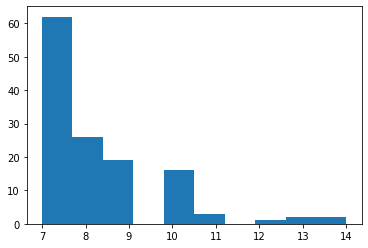

In [29]:
plt.hist(list_row_nan_6)

In [30]:
sum(list_row_nan_6)

1072

In [31]:
len(list_row_nan_6)

131

(array([[ 10.,   0.,  39.,   0.,   0.,  66.,   0.,  16.,   0.,   0.],
        [108.,   0., 191.,   0.,   0., 264.,   0.,  94.,   0.,  37.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 2 Lists of Patches objects>)

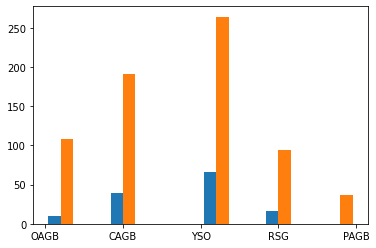

In [32]:
plt.hist([list_Class_6,df['SpClass']])

In [33]:
df.drop(list_index_6, axis=0, inplace=True)
df = df.reset_index(drop=True)

In [35]:
nan_data_point = df.isnull().sum().sum()
all_data_point = df.shape[0]*df.shape[1]
missing_fraction = nan_data_point / all_data_point

print(f'There are {all_data_point} data points in this data')
print(f'There are {nan_data_point} missing data in this data')
print(f'The fraction of missing data in all data is {missing_fraction}')

There are 9008 data points in this data
There are 1389 missing data in this data
The fraction of missing data in all data is 0.154196269982238


(array([ 98.,   0., 152.,   0.,   0., 198.,   0.,  37.,   0.,  78.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

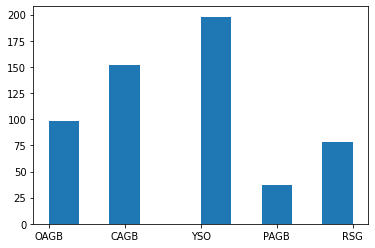

In [36]:
plt.hist(df['SpClass'])

OAGB


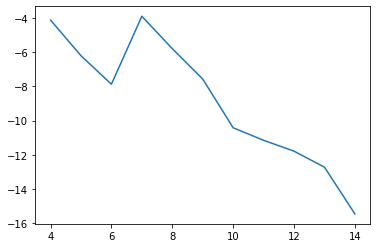

In [37]:
star_number = 70
plt.plot(np.array(df.iloc[star_number][:-1]))
print(df.iloc[star_number][-1])

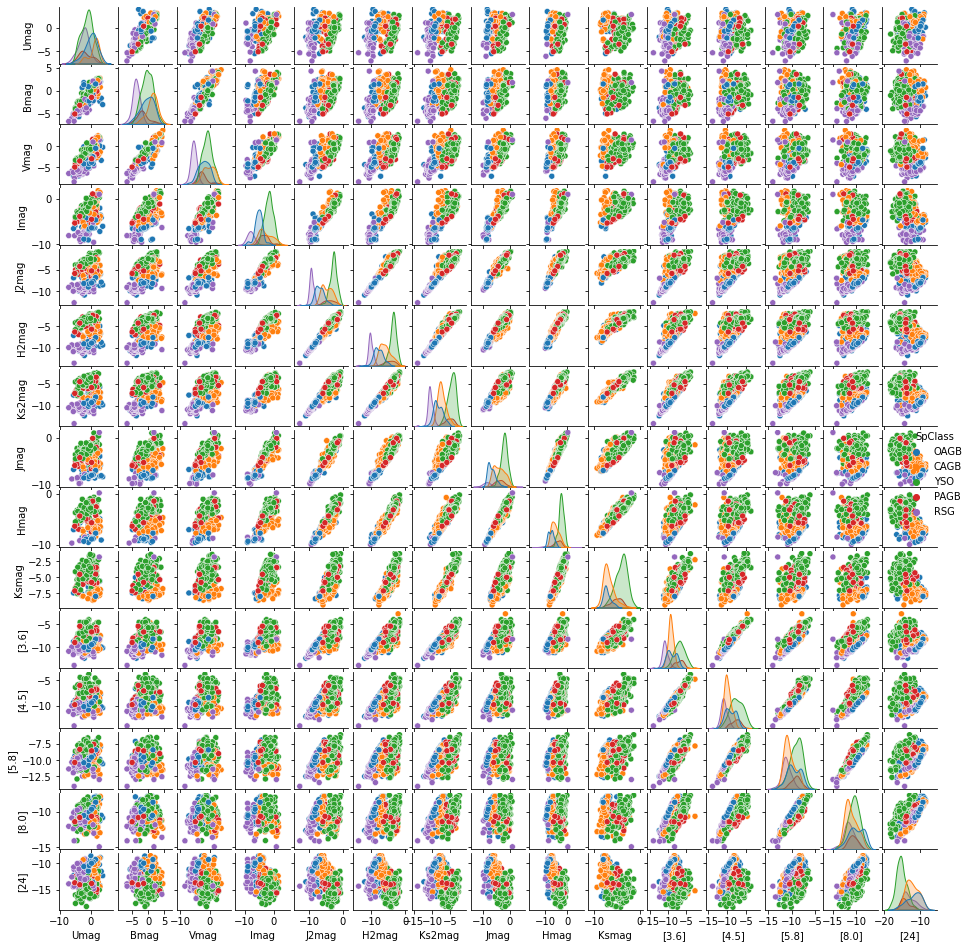

In [40]:
col = df.columns
g = sns.pairplot(df.loc[:,col],hue="SpClass")
g.fig.set_size_inches(13,13)

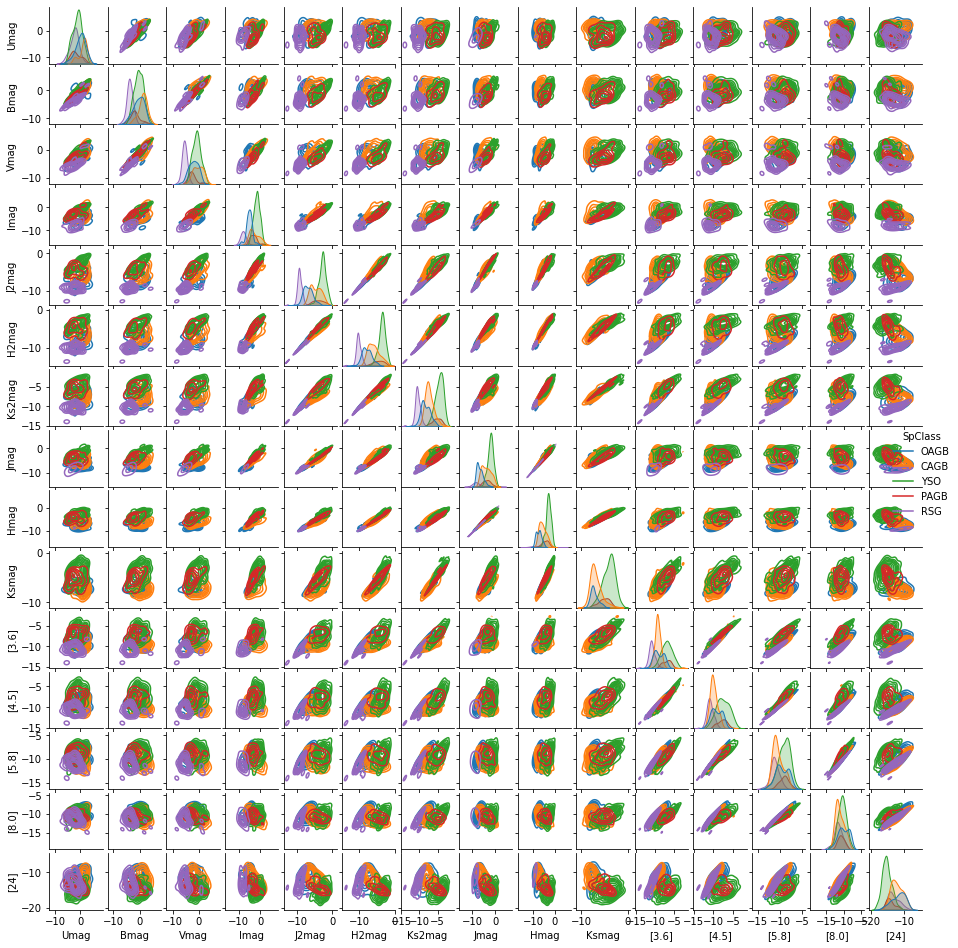

In [38]:
col = df.columns
g = sns.pairplot(df.loc[:,col],hue="SpClass", kind='kde')
g.fig.set_size_inches(13,13)

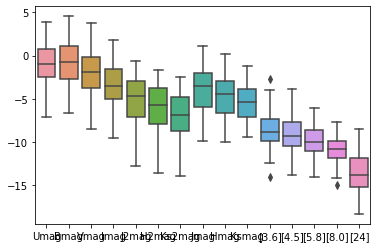

In [41]:
sns.boxplot(data=df.loc[:,col[0:-1]])
plt.show()

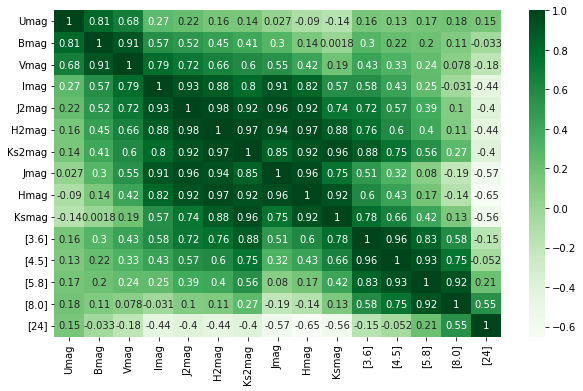

In [42]:
plt.figure(figsize=(10,6)) #manage the size of the plot
sns.heatmap(df.loc[:,col].corr(),annot=True , cmap= "Greens" ) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

## Data Pre

In [43]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
EY = LE.fit_transform(Y)
EY = pd.DataFrame(EY)
EY.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X , EY , test_size= 0.25 , random_state = 1234 )

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state= 0 )
X_train = imp.fit_transform(X_train)
X_test  = imp.transform(X_test)

#X = pd.DataFrame(imp_data, columns= X.columns)

In [ ]:
!git clone https://github.com/ireis/PRF.git

Cloning into 'PRF'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 223 (delta 3), reused 6 (delta 2), pack-reused 211
Receiving objects: 100% (223/223), 15.34 MiB | 12.52 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [ ]:
from PRF import PRF

In [ ]:
prf_cls = PRF.prf(n_estimators=4, bootstrap=True, keep_proba=0.5)
prf_cls.fit( X=X_train, y=np.array(y_train))
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(y_test))))

PRF: 35.730496453900706


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

r_scaler = RobustScaler()
X_rbst = r_scaler.fit_transform(X)
X_rbst = pd.DataFrame(X_rbst, columns= X.columns)

s_scaler = StandardScaler()
X_std = s_scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns= X.columns)

mm_scaler = MinMaxScaler()
X_mm = mm_scaler.fit_transform(X)
X_mm = pd.DataFrame(X_mm, columns= X.columns)

In [ ]:
from sklearn.decomposition import PCA

t = X
pca = PCA()
t = pca.fit_transform(t)
PX = pd.DataFrame(t)   

t = X_rbst
rpca = PCA()
t = rpca.fit_transform(t)
PRX = pd.DataFrame(t) 

t = X_mm
mpca = PCA()
t = mpca.fit_transform(t)
PMX = pd.DataFrame(t)   

t = X_std
spca = PCA()
t = spca.fit_transform(t)
PSX = pd.DataFrame(t)